Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Ingest the data to notebook

In [140]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


# EDA

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [143]:
df.duplicated().sum()

1

In [144]:
df = df.drop_duplicates()

In [145]:
df.thal.value_counts(), df.cp.value_counts(), df.slope.value_counts(), df.restecg.value_counts()

(2    165
 3    117
 1     18
 0      2
 Name: thal, dtype: int64,
 0    143
 2     86
 1     50
 3     23
 Name: cp, dtype: int64,
 2    141
 1    140
 0     21
 Name: slope, dtype: int64,
 1    151
 0    147
 2      4
 Name: restecg, dtype: int64)

In [146]:
df[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.000,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.000,1,0,0,0


In [147]:
df.drop(df.loc[ df['thal']==0].index, inplace=True)

In [148]:
df.thal.value_counts()

2    165
3    117
1     18
Name: thal, dtype: int64

In [149]:
df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})

In [150]:
df['cp']=df['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})

In [151]:
df['slope']=df['slope'].replace({0:'upsloping',1:'flat',2:'downsloping'})

In [152]:
df['thal']=df['thal'].replace({1:'normal',2:'fixed defect',3:'reversable defect'})

In [153]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,normal,150,0,2.300,upsloping,0,normal,1
1,37,1,non-anginal pain,130,250,0,having ST-T wave abnormality,187,0,3.500,upsloping,0,fixed defect,1
2,41,0,atypical angina,130,204,0,normal,172,0,1.400,downsloping,0,fixed defect,1
3,56,1,atypical angina,120,236,0,having ST-T wave abnormality,178,0,0.800,downsloping,0,fixed defect,1
4,57,0,typical angina,120,354,0,having ST-T wave abnormality,163,1,0.600,downsloping,0,fixed defect,1


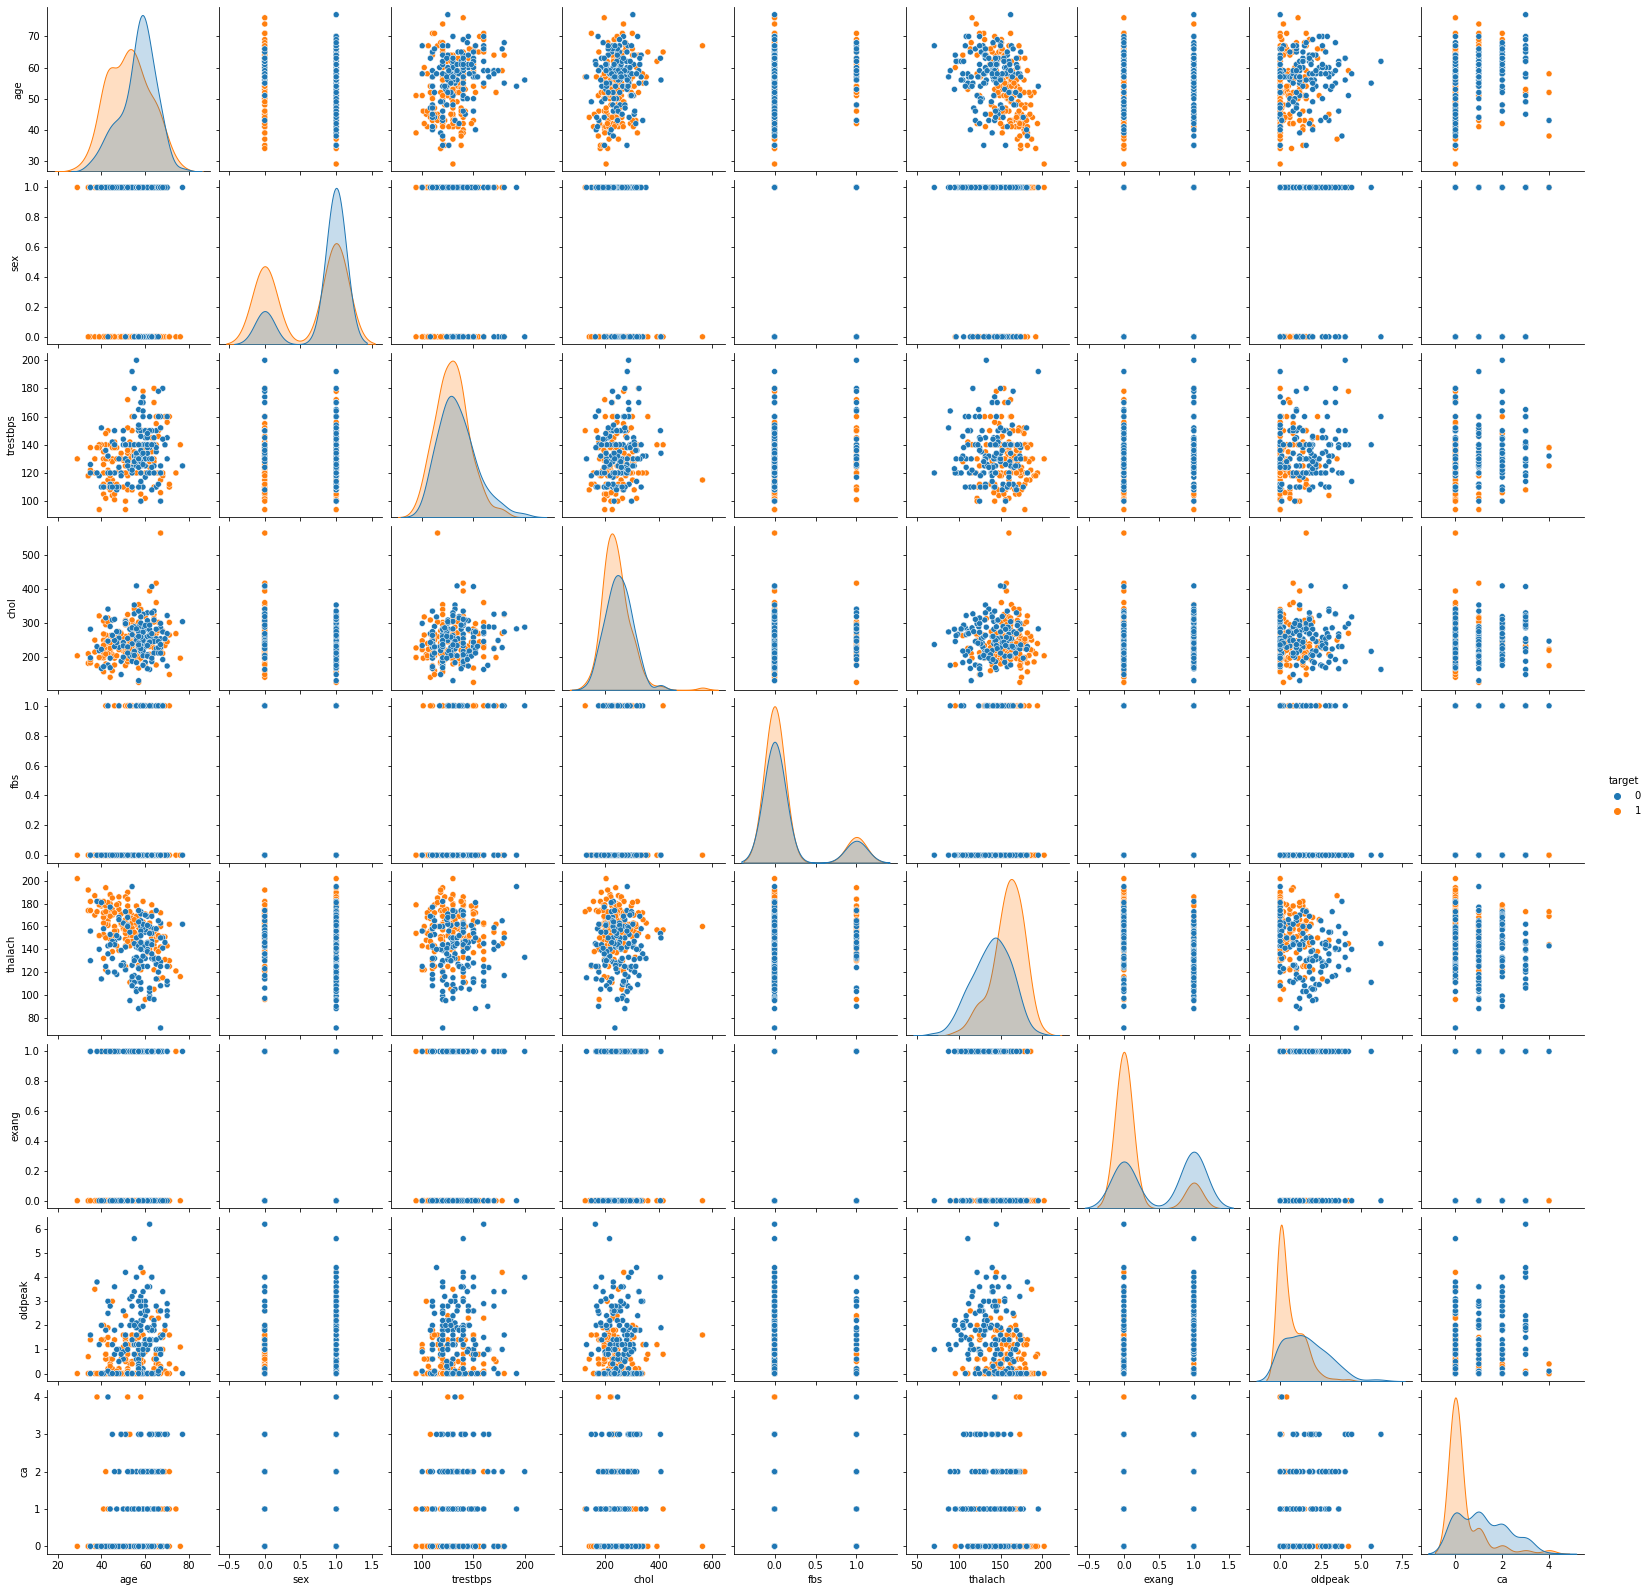

In [156]:
sns.pairplot(df.select_dtypes(include='number'), hue='target');

In [157]:
df.target.value_counts(normalize= True)

1   0.543
0   0.457
Name: target, dtype: float64

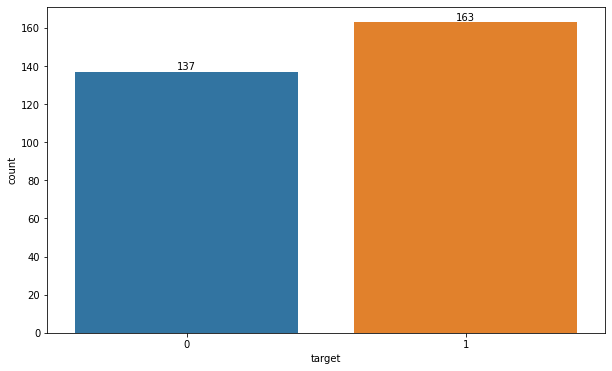

In [158]:
ax = sns.countplot(df['target'])
ax.bar_label(ax.containers[0]);

##balanced dataset

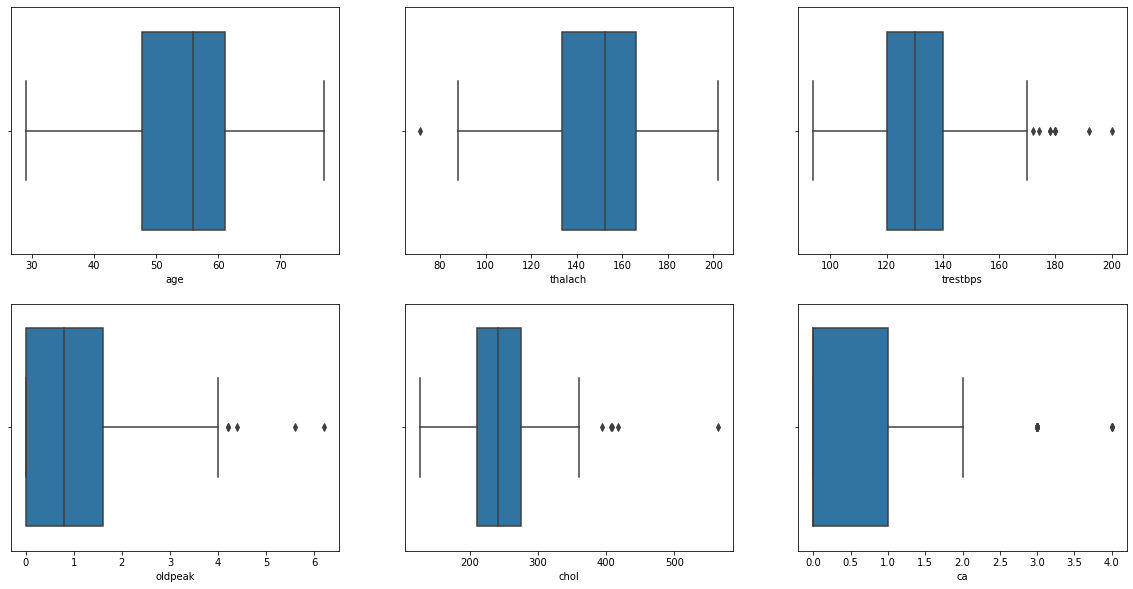

In [159]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(df['age'], ax= ax[0,0])
sns.boxplot(df['thalach'], ax= ax[0, 1])
sns.boxplot(df['trestbps'], ax=ax[0,2])
sns.boxplot(df['oldpeak'], ax=ax[1, 0])
sns.boxplot(df['chol'], ax= ax[1,1])
sns.boxplot(df['ca'], ax=ax[1,2]);


In [160]:
df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target
count,300.000,300.000,300.000,300.000,300.000,300.000,300.000,300.000,300.000,300.000
mean,54.433,0.683,131.627,246.743,0.147,149.663,0.327,1.047,0.723,0.543
std,9.077,0.466,17.620,51.838,0.354,22.890,0.470,1.164,1.008,0.499
min,29.000,0.000,94.000,126.000,0.000,71.000,0.000,0.000,0.000,0.000
25%,47.750,0.000,120.000,211.000,0.000,133.750,0.000,0.000,0.000,0.000
50%,56.000,1.000,130.000,241.500,0.000,152.500,0.000,0.800,0.000,1.000
75%,61.000,1.000,140.000,275.000,0.000,166.000,1.000,1.600,1.000,1.000
max,77.000,1.000,200.000,564.000,1.000,202.000,1.000,6.200,4.000,1.000


<AxesSubplot:>

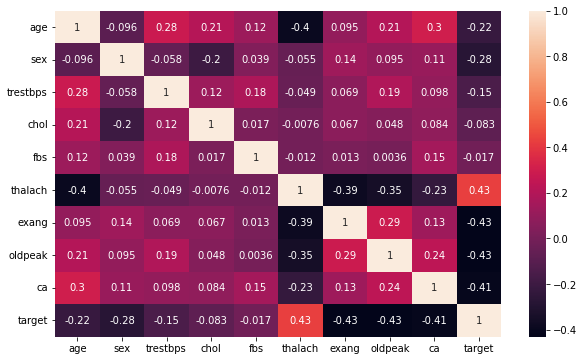

In [161]:
sns.heatmap(df.corr(), annot=True)

In [182]:
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 302
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   300 non-null    int64  
 1   sex                                   300 non-null    int64  
 2   trestbps                              300 non-null    int64  
 3   chol                                  300 non-null    int64  
 4   fbs                                   300 non-null    int64  
 5   thalach                               300 non-null    int64  
 6   exang                                 300 non-null    int64  
 7   oldpeak                               300 non-null    float64
 8   ca                                    300 non-null    int64  
 9   target                                300 non-null    int64  
 10  cp_atypical angina                    300 non-null    uint8  
 11  cp_non-anginal pain

# Data Preprocessing

In [112]:
from sklearn.model_selection import train_test_split

In [183]:
X = df.drop('target', axis=1)
y = df['target']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)


# Implement Logistic Regression and Evaluate

In [185]:
from sklearn.linear_model import LogisticRegressiong_
from sklearn.preprocessing import MinMaxScaler

In [166]:
scaler = MinMaxScaler()


In [186]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [191]:
log_model = LogisticRegression()

In [192]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [193]:
y_test_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [212]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score

In [246]:
def my_logistic_report(model, X_train, y_train, X_test,y_test, threshold=0.5): # you could make it even more general!
    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)[:,1]
   
    
    cm = confusion_matrix(y_test, y_pred)
    accuracy = round(accuracy_score(y_test,y_pred), 3)
    precision = round( precision_score(y_test,y_pred), 3)
    recall = round(recall_score(y_test,y_pred), 3)
    f1score = round(f1_score(y_test,y_pred), 3)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
  
    print('Accuracy  : ' , accuracy)
    print('Precision : ' , precision)
    print('Recall    : ' , recall)
    print('f1_score  : ' , f1score)
   
    return cm_labled

In [247]:
my_logistic_report(log_model, X_train_scaled, y_train, X_test_scaled,y_test, threshold=0.5)

Accuracy  :  0.883
Precision :  0.882
Recall    :  0.909
f1_score  :  0.896


,Predict : negative,Predict :positive
Actual : negative,23,4
Actual : positive,3,30


In [ ]:
 ### Finding suitable treshold is not to need because our data is balanced 

In [240]:
from sklearn.model_selection import cross_validate

In [224]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [201]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring=['accuracy', 'recall', 'f1', 'precision'], cv = 10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_recall,test_f1,test_precision
1,0.016,0.004,0.792,0.769,0.800,0.833
2,0.008,0.003,0.875,0.923,0.889,0.857
3,0.006,0.003,0.917,0.923,0.923,0.923
4,0.005,0.002,0.833,0.846,0.846,0.846
5,0.004,0.002,0.833,0.846,0.846,0.846
6,0.004,0.002,0.750,0.769,0.769,0.769
7,0.004,0.002,0.875,0.846,0.880,0.917
8,0.004,0.002,0.833,0.846,0.846,0.846
9,0.004,0.002,0.667,0.846,0.733,0.647
10,0.004,0.002,0.792,0.846,0.815,0.786


In [204]:
df_scores.mean()[2:]

test_accuracy    0.817
test_recall      0.846
test_f1          0.835
test_precision   0.827
dtype: float64

In [249]:
my_logistic_report(log_model, X_train_scaled, y_train, X_test_scaled,y_test, threshold=0.5)

Accuracy  :  0.883
Precision :  0.882
Recall    :  0.909
f1_score  :  0.896


,Predict : negative,Predict :positive
Actual : negative,23,4
Actual : positive,3,30


In [233]:
C = np.logspace(-1, 5, 100) # we create a sample space of 100 values between -1 and 5
C

array([     0.1       ,      0.1149757 ,      0.13219411,      0.15199111,
            0.17475284,      0.2009233 ,      0.23101297,      0.26560878,
            0.30538555,      0.35111917,      0.40370173,      0.46415888,
            0.53366992,      0.61359073,      0.70548023,      0.81113083,
            0.93260335,      1.07226722,      1.23284674,      1.41747416,
            1.62975083,      1.87381742,      2.15443469,      2.47707636,
            2.84803587,      3.27454916,      3.76493581,      4.32876128,
            4.97702356,      5.72236766,      6.57933225,      7.56463328,
            8.69749003,     10.        ,     11.49756995,     13.21941148,
           15.19911083,     17.475284  ,     20.09233003,     23.101297  ,
           26.56087783,     30.53855509,     35.11191734,     40.37017259,
           46.41588834,     53.36699231,     61.35907273,     70.54802311,
           81.11308308,     93.26033469,    107.2267222 ,    123.28467394,
          141.74741629,  

In [234]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : [C,1],
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1)

In [235]:
grid_model.fit(X_train_scaled,y_train)

/Users/rabiaaras/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rabiaaras/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rabiaaras/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rabiaaras/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [array([     0.1       ,      0.20691381,      0.42813324,      0.88586679,
            1.83298071,      3.79269019,      7.8475997 ,     16.23776739,
           33.59818286,     69.51927962,    143.84498883,    297.63514416,
          615.84821107,   1274.2749857 ,   2636.65089873,   5455.59478117,
        11288.37891685,  23357.2146909 ,  48329.30238572, 100000.        ]),
                               1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [236]:
grid_model.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [248]:
my_logistic_report(grid_model, X_train_scaled, y_train, X_test_scaled,y_test, threshold=0.5)

Accuracy  :  0.85
Precision :  0.875
Recall    :  0.848
f1_score  :  0.862


,Predict : negative,Predict :positive
Actual : negative,23,4
Actual : positive,5,28


In [250]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_precision_recall_curve, plot_roc_curve

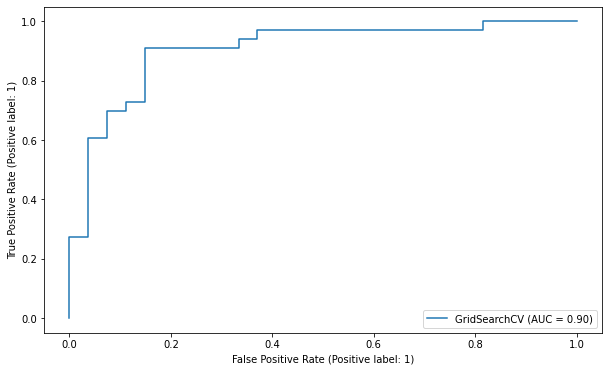

In [251]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

# Implement KNN and Evaluate

In [252]:
from sklearn.neighbors import KNeighborsClassifier

In [253]:
knn = KNeighborsClassifier()

In [254]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [255]:
knn_pred = knn.predict(X_test_scaled)

In [256]:
my_logistic_report(knn, X_train_scaled, y_train, X_test_scaled,y_test, threshold=0.5)

Accuracy  :  0.833
Precision :  0.811
Recall    :  0.909
f1_score  :  0.857


,Predict : negative,Predict :positive
Actual : negative,20,7
Actual : positive,3,30


In [262]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0, 0.5, 'test_error_rates')

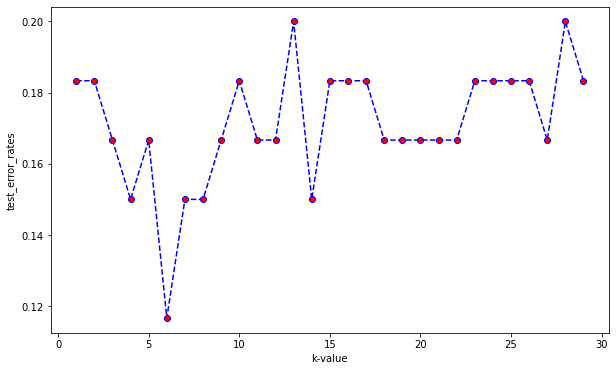

In [266]:
plt.plot( range(1, 30), test_error_rates, color = 'blue', marker = 'o', linestyle = '--', markerfacecolor='red')
plt.xlabel('k-value')
plt.ylabel('test_error_rates')


In [267]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train)
my_logistic_report(knn, X_train_scaled, y_train, X_test_scaled,y_test, threshold=0.5)

Accuracy  :  0.883
Precision :  0.882
Recall    :  0.909
f1_score  :  0.896


,Predict : negative,Predict :positive
Actual : negative,23,4
Actual : positive,3,30


In [268]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
my_logistic_report(knn, X_train_scaled, y_train, X_test_scaled,y_test, threshold=0.5)

Accuracy  :  0.85
Precision :  0.816
Recall    :  0.939
f1_score  :  0.873


,Predict : negative,Predict :positive
Actual : negative,20,7
Actual : positive,2,31


In [269]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
my_logistic_report(knn, X_train_scaled, y_train, X_test_scaled,y_test, threshold=0.5)

Accuracy  :  0.833
Precision :  0.811
Recall    :  0.909
f1_score  :  0.857


,Predict : negative,Predict :positive
Actual : negative,20,7
Actual : positive,3,30


In [270]:
knn_grid = KNeighborsClassifier()

In [271]:
k_values = range(1, 30)

In [272]:
param_grid = {'n_neighbors' : k_values}

In [273]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring='accuracy')

In [274]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)}, scoring='accuracy')

In [275]:
my_logistic_report(knn_grid_model, X_train_scaled, y_train, X_test_scaled,y_test, threshold=0.5)

Accuracy  :  0.833
Precision :  0.811
Recall    :  0.909
f1_score  :  0.857


,Predict : negative,Predict :positive
Actual : negative,20,7
Actual : positive,3,30


# Chose best model and make a random prediction 

In [ ]:
## As a conclusion we aplied two models to predict heart disease and we got prety decent scores both of them
## We decided to use Logistic Model due to its interpretability and low computational cost.